# Example: Differentially methylated regions -- GSE69852 
- Using GEO dataset GSE69852 (6 samples, 450k)
- **Title:** Patterns of DNA methylation in human fetal and adult liver
- https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE69852
- We demonstrate a basic (beta_values + meta_data) --> DMP --> DMR calculation.

Claims in the paper:
- Nearly half (42%) of the CpGs in human liver show a significant difference in methylation comparing fetal and adult samples. 
- 69% of the significant sites differed in their mean methylation beta value by ≤0.2.

Note on phenotype:
The original meta data had ages of samples in different units (e.g. 55yr, 21wk) so we manually converted these to a single measurement (converted_age, float, years) so that linear regression could run. Alternatively, you could treat the two groups (55-56 years vs 20-22 weeks) as a phenotype with two groups (1 and 0) and apply logistic regression.

In [1]:
import methylize as m
import pandas as pd
from pathlib import Path
df = pd.read_pickle(Path('data/GSE69852_beta_values.pkl'))
meta = pd.read_pickle(Path('data/GSE69852_GPL13534_meta_data.pkl'))

INFO:methylize.diff_meth_pos:Converted your beta values into M-values; (6, 100000)


Probes:   0%|          | 0/100000 [00:00<?, ?it/s]

8 NaNs dropped


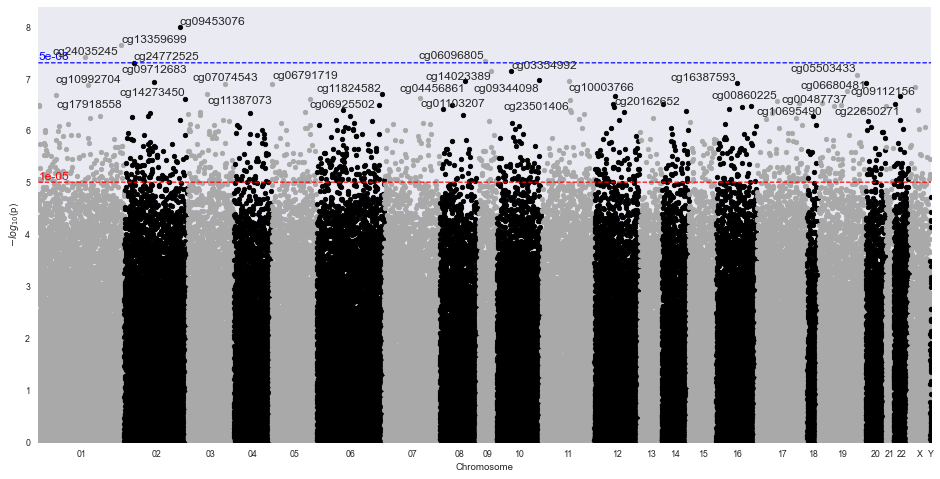

INFO:methylprep.files.manifests:Reading manifest file: HumanMethylation450k_15017482_v3.csv
INFO:methylprep.files.manifests:Reading manifest file: HumanMethylation450k_15017482_v3.csv
Calculating ACF out to: 367
with 14 lags: [1, 31, 61, 91, 121, 151, 181, 211, 241, 271, 301, 331, 361, 391]
4873754 bases used as coverage for sidak correction
INFO:methylize.diff_meth_regions:wrote: data.regions-p.bed.gz, (regions with corrected-p < 0.05: 0)


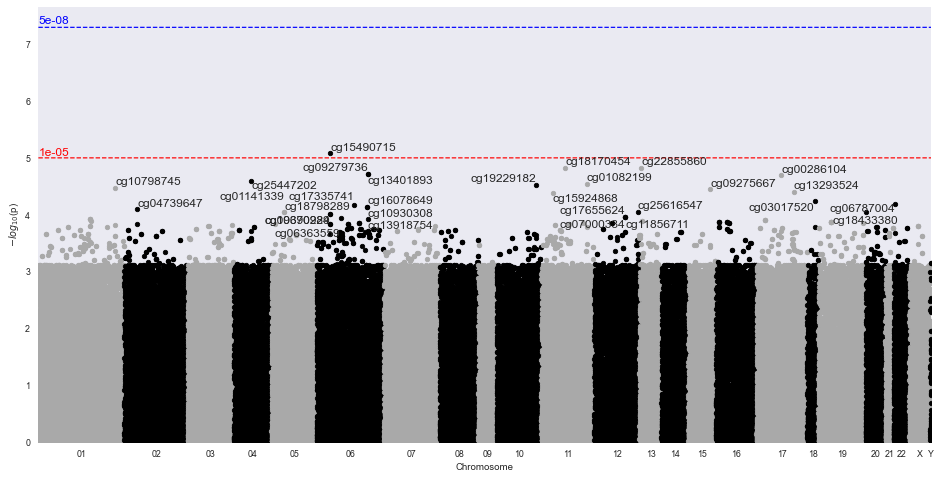

INFO:methylize.genome_browser:Loaded 24371 CpG regions from data_regions.csv.
INFO:methylize.genome_browser:Using cached `refGene`: /Users/mmaxmeister/methylize/methylize/data/refGene.pkl with (135634) genes
Mapping genes: 100%|██████████| 135634/135634 [00:59<00:00, 2277.89it/s]
INFO:methylize.genome_browser:Wrote data_regions_genes.csv


In [2]:
res = m.diff_meth_pos(df.sample(100000), meta['converted_age'])
m.manhattan_plot(res, '450k')
bed = m.diff_meth_regions(res, '450k', prefix='data', plot=True)

One would interpret the DMR plot to indicate that there were no significantly different methylated regions. Note, this example only ran 100000 of the 485,512 probes.

# All data, logistic regression

INFO:methylize.diff_meth_pos:Converted your beta values into M-values; (6, 485512)
INFO:methylize.diff_meth_pos:Logistic regression: Phenotype (Normal Adult liver) was assigned to 0 and (Normal Fetal Liver) was assigned to 1.


Probes:   0%|          | 0/485512 [00:00<?, ?it/s]

218806 probes failed the logistic regression analysis due to perfect separation and could not be included in the final results.
13209 probes failed the logistic regression analysis due to LinearAlgebra error and could not be included in the final results.
148 probes failed the logistic regression analysis due to other unexplained reasons and could not be included in the final results.
Linear Algebra and Perfect Separation errors occur when the dataset is (a) too small to observe
events with low probabilities, or has (b) too many covariates in the model, leading to individual cell
sizes that are too small. Singular Matrix Errors occur when there is no variance in the predictors
(probe values and covariates).
27 NaNs dropped


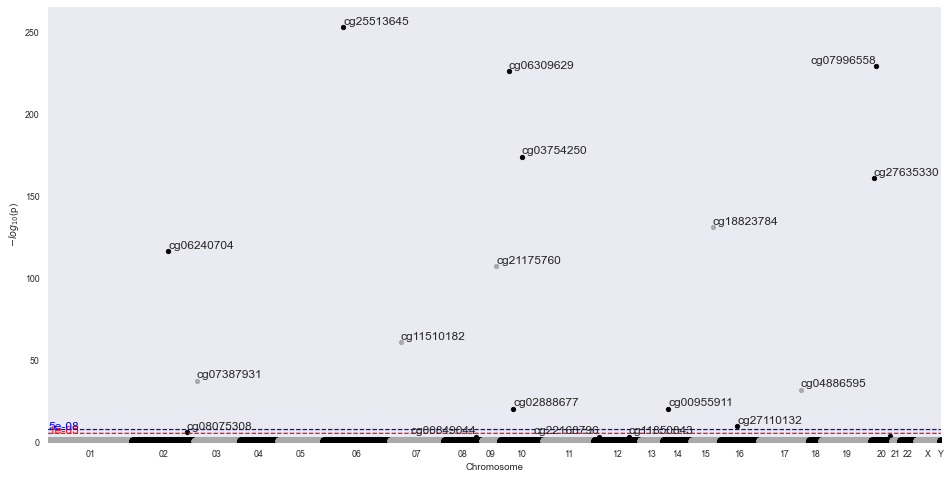

INFO:methylprep.files.manifests:Reading manifest file: HumanMethylation450k_15017482_v3.csv
INFO:methylprep.files.manifests:Reading manifest file: HumanMethylation450k_15017482_v3.csv
Calculating ACF out to: 50
with 3  lags: [1, 31, 61]
11192348 bases used as coverage for sidak correction
INFO:methylize.diff_meth_regions:wrote: data.regions-p.bed.gz, (regions with corrected-p < 0.05: 16)


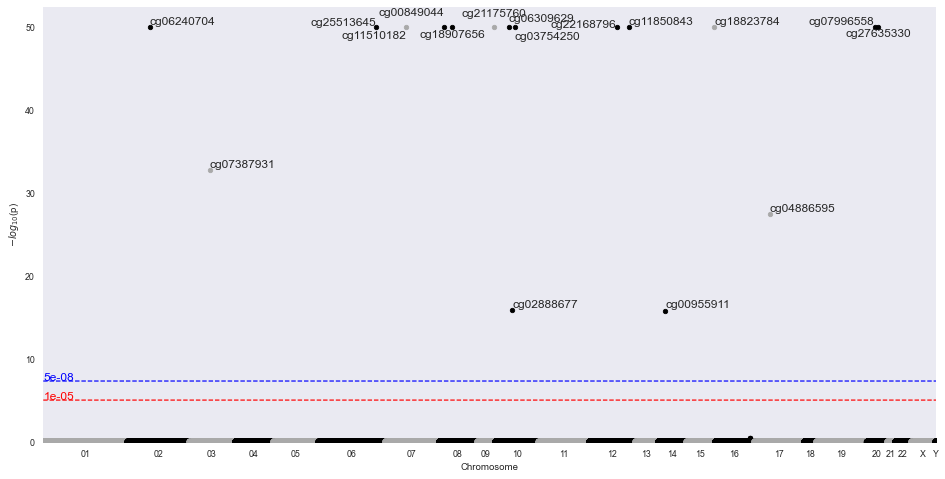

INFO:methylize.genome_browser:Loaded 17 CpG regions from data_regions.csv.
INFO:methylize.genome_browser:Using cached `refGene`: /Users/mmaxmeister/methylize/methylize/data/refGene.pkl with (135634) genes
Mapping genes: 100%|██████████| 135634/135634 [00:56<00:00, 2381.53it/s]
INFO:methylize.genome_browser:Wrote data_regions_genes.csv


In [3]:
result = m.diff_meth_pos(df, meta['description'])
m.manhattan_plot(result, '450k')
bed_files = m.diff_meth_regions(result, '450k', prefix='data', plot=True)

In [4]:
bed_files

['data.args.txt',
 'data.acf.txt',
 'data.fdr.bed.gz',
 'data.slk.bed.gz',
 'data.regions-p.bed.gz',
 'data_regions.csv',
 'data_stats.csv',
 'data_regions_genes.csv',
 'data_dmp_stats.bed']

In [5]:
bed = pd.read_csv('data.regions-p.bed.gz', sep='\t')
bed

,#chrom,start,end,min_p,n_probes,z_p,z_sidak_p
0,10,4034204,4034254,0.000000e+00,1,1.000000e-07,2.214000e-02
1,10,31031409,31031459,0.000000e+00,1,1.000000e-07,2.214000e-02
2,10,75210411,75210461,2.351000e-12,1,1.392000e-16,2.485000e-11
3,12,43840121,43840171,0.000000e+00,1,1.000000e-07,2.214000e-02
4,12,124453780,124453830,0.000000e+00,1,1.000000e-07,2.214000e-02
5,14,37592783,37592833,2.598000e-12,1,1.641000e-16,2.485000e-11
6,15,78810879,78810929,0.000000e+00,1,1.000000e-07,2.214000e-02
7,17,29005861,29005911,6.351000e-24,1,3.510000e-28,7.857000e-23
8,2,200911124,200911174,0.000000e+00,1,1.000000e-07,2.214000e-02
9,20,1470868,1470918,0.000000e+00,1,1.000000e-07,2.214000e-02
